# Расчётное задание теория вероятностей №1

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import binom, norm
import pandas as pd

# Строим априорное и апостериорное распеределение вероятностей

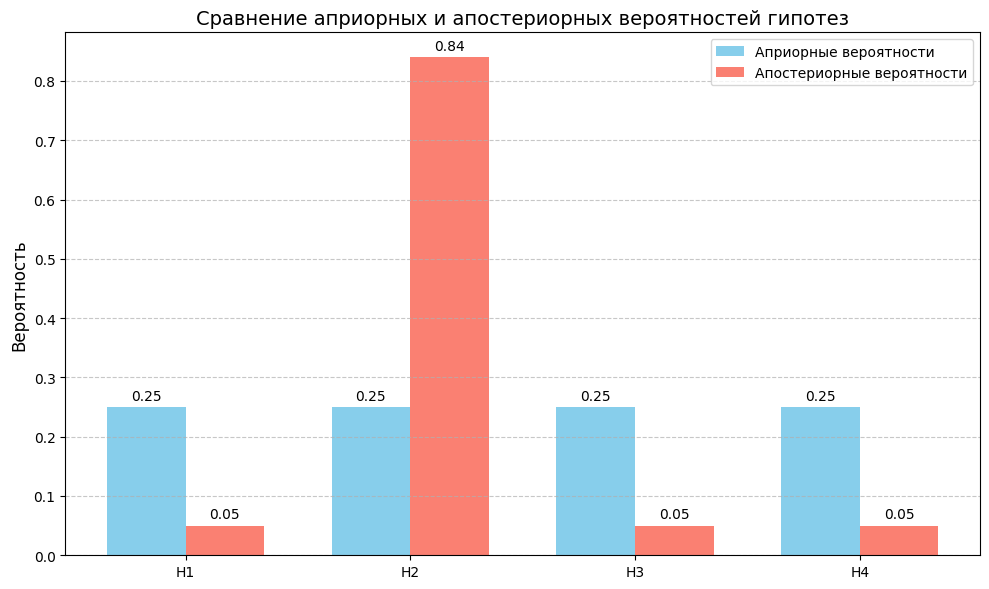

In [10]:
# Данные
hypotheses = ['H1', 'H2', 'H3', 'H4']
prior = [0.25, 0.25, 0.25, 0.25]  # Априорные вероятности P(H_i)
posterior = [0.05, 0.84, 0.05, 0.05]  # Апостериорные вероятности P(H_i|A)

# Настройки графика
x = np.arange(len(hypotheses))  # Позиции гипотез на оси X
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбцов
rects1 = ax.bar(x - width/2, prior, width, label='Априорные вероятности', color='skyblue')
rects2 = ax.bar(x + width/2, posterior, width, label='Апостериорные вероятности', color='salmon')

# Подписи и оформление
ax.set_title('Сравнение априорных и апостериорных вероятностей гипотез', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(hypotheses)
ax.set_ylabel('Вероятность', fontsize=12)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений над столбцами
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig("graphs/aprior_aposterior.svg", dpi=300)

# Биномиальное распределение и распределение Муавра-Лапласа

Таблица сравнения вероятностей для m=1..20:

 m  Биномиальное (PMF)  Муавр-Лаплас (CDF)
 1            0.000019            0.000061
 2            0.000181            0.000326
 3            0.001087            0.001427
 4            0.004621            0.005128
 5            0.014786            0.015133
 6            0.036964            0.036677
 7            0.073929            0.073014
 8            0.120134            0.119391
 9            0.160179            0.160364
10            0.176197            0.176937
11            0.160179            0.160364
12            0.120134            0.119391
13            0.073929            0.073014
14            0.036964            0.036677
15            0.014786            0.015133
16            0.004621            0.005128
17            0.001087            0.001427
18            0.000181            0.000326
19            0.000019            0.000061
20            0.000001            0.000009


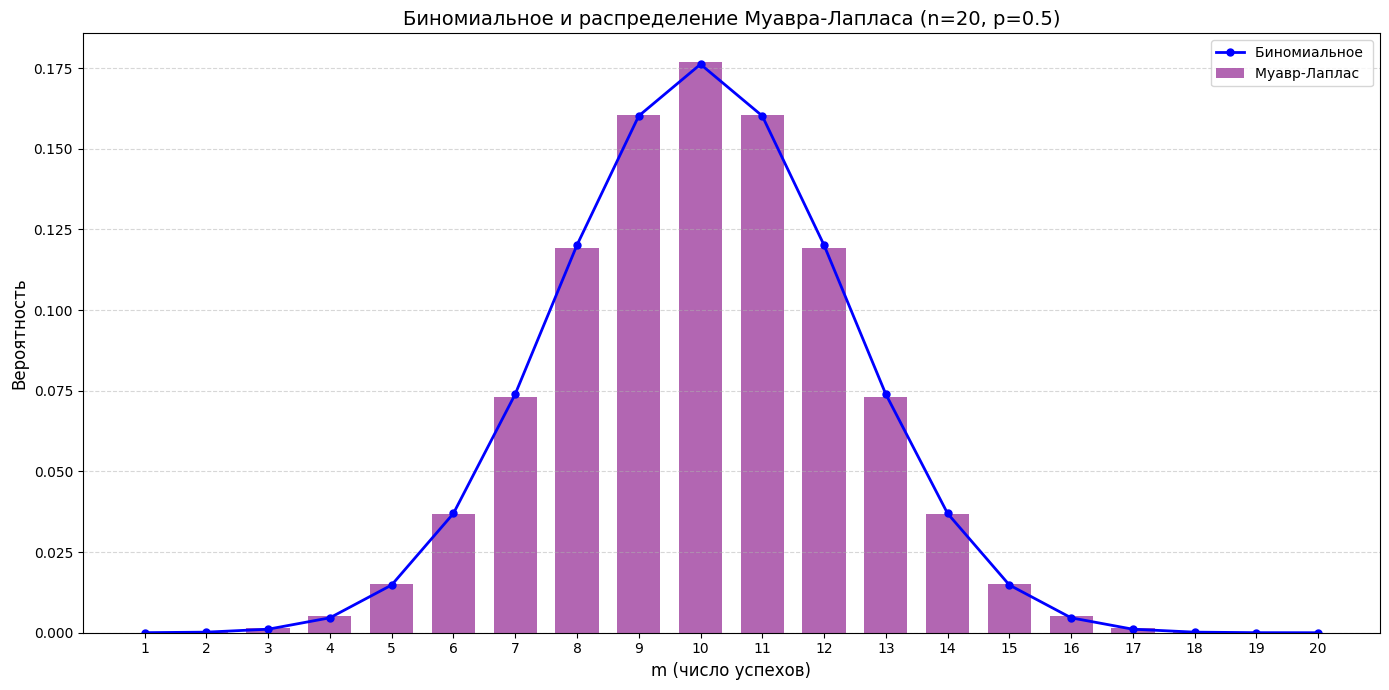

In [20]:
# Параметры распределения
n = 20
p = 0.5
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Значения m от 1 до 20
m_values = np.arange(1, 21)

# Расчёт биномиальных вероятностей
binomial_probs = binom.pmf(m_values, n, p)

# Расчёт нормального приближения с поправкой на непрерывность
normal_probs = norm.cdf(m_values + 0.5, mu, sigma) - norm.cdf(m_values - 0.5, mu, sigma)

# Создание DataFrame
df = pd.DataFrame({
    'm': m_values,
    'Биномиальное (PMF)': binomial_probs,
    'Муавр-Лаплас (CDF)': normal_probs
})

# Вывод таблицы
print("Таблица сравнения вероятностей для m=1..20:\n")
print(df.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

# Построение графика
plt.figure(figsize=(14, 7))

# Гистограмма для Муавра-Лапласа (столбцы)
plt.bar(m_values, normal_probs, width=0.7, alpha=0.6, label='Муавр-Лаплас ', color='purple')

# Непрерывная функция для биномиального распределения (линия)
plt.plot(m_values, binomial_probs, marker='o', markersize=5, linewidth=2, label='Биномиальное ', color='blue')

# Настройки графика
plt.title('Биномиальное и распределение Муавра-Лапласа (n=20, p=0.5)', fontsize=14)
plt.xlabel('m (число успехов)', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.xticks(m_values)
plt.xlim(0, 21)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('graphs/bin_laplas_muavr.svg', dpi=300)